## Let's start with all the data

## Scripts

In [101]:
!pip install PyPDF2
# !python -m pip install --upgrade pip
# !pip --version



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [103]:
# import PyPDF2

# def extract_text_from_pdf(pdf_file_path, txt_file_path):
#     # Open the PDF file in binary mode
#     with open(pdf_file_path, 'rb') as pdf_file:
#         # Create a PDF reader object
#         pdf_reader = PyPDF2.PdfFileReader(pdf_file)
        
#         # Initialize an empty string to store the extracted text
#         extracted_text = ''
        
#         # Iterate through each page in the PDF file
#         for page_num in range(pdf_reader.numPages):
#             # Get the text from the current page
#             page_text = pdf_reader.getPage(page_num).extractText()
            
#             # Append the page text to the extracted text
#             extracted_text += page_text
        
#         # Write the extracted text to a TXT file
#         with open(txt_file_path, 'w', encoding='utf-8') as txt_file:
#             txt_file.write(extracted_text)

# # Specify the paths for your PDF and TXT files
# pdf_file_path = 'scripts-data/Pink.pdf'
# txt_file_path = 'scripts-data/file.txt'

# # Call the function to extract text from the PDF and save it to the TXT file
# extract_text_from_pdf(pdf_file_path, txt_file_path)



In [1]:
import pandas as pd

In [2]:
pd.read_csv('trailer-data/complete-data.csv')

,frame_number,gender,emotion,year,movie_name
0,28,woman,happy,2014,dedh_ishqiya
1,62,woman,happy,2014,dedh_ishqiya
2,60,man,angry,2014,dedh_ishqiya
3,60,man,sad,2014,dedh_ishqiya
4,60,man,angry,2014,dedh_ishqiya
...,...,...,...,...,...
32192,18,man,happy,2016,housefull_3
32193,25,man,neutral,2016,housefull_3
32194,25,man,neutral,2016,housefull_3
32195,25,man,happy,2016,housefull_3


In [11]:
pd.read_csv('trailer-data/trailers_list.csv')

,movie-name,year-of-release,trailer,movie
0,dedh_ishqiya,2014,1,0
1,love_sex_aur_dhokha,2010,1,0
2,newton,2017,1,0
3,band_baaja_baaraat,2010,1,0
4,the_blueberry_hunt,2016,1,0
...,...,...,...,...
875,warning,2013,1,0
876,ranbanka,2015,1,0
877,sadda_adda,2012,1,0
878,loveshhuda,2016,1,0


## Wikepedia

In [47]:
wv = pd.read_csv('wikipedia-data/avg_wv_relation.csv',names=['movie-name','gender','role','feature'])
filter_df = wv.dropna()
filter_df.loc[:,'role']=filter_df['role'].apply(lambda x:list(set(x.split(","))))
filter_df.loc[:,'feature'] = filter_df['feature'].apply(lambda x:list(set(x.split(","))))
# # wv.head()
filter_df.head()

,movie-name,gender,role,feature
0,woman_Aan Milo Sajna,FEMALE,[young],[-0.105138 -0.029248 -0.063298 -0.007706 -0.18...
7,father_Bachpan,MALE,[unhappilly],[0.0]
8,Rahim_Bachpan,MALE,"[father, father]",[ -2.82591750e-01 6.52440000e-02 -2.3607450...
9,Kashi_Bachpan,UNKNOWN,[innocent],[ -1.03062000e-01 1.66135000e-01 -2.6792900...
12,actor_Bombay Talkie,MALE,[famous],[ 0.022116 -0.270536 0.235497 0.218431 -0.12...


## Coref plot

In [36]:
pd.read_csv('wikipedia-data/coref_plot.csv',index_col=0)

,Movie Name,Coref Plot
0,Aan Milo Sajna,Widowed and ailing Savitri Choudhury lives a ...
1,Aan Milo Sajna,Savitri knows that Anil is only waiting for S...
2,Aan Milo Sajna,The Diwan convinces Anil to mend Anil ways g...
3,Aan Milo Sajna,Shortly thereafter Anil does appear to have m...
4,Aan Milo Sajna,Deepali moves in the mansion looks after Sav...
...,...,...
34723,Jo Hum Chahein,Rohan discovers Amrita and Vikram were just u...
34724,Jo Hum Chahein,Rohan apologizes to Rohan father for all Roha...
34725,Jo Hum Chahein,Neha was n't ready for a child and was only h...
34726,Jo Hum Chahein,Rohan is shattered Neha apologizes and asks ...


## Female adjectives

In [ ]:
!pip install matplotlib
!pip install pandas
!pip install wordcloud


## Adjectives

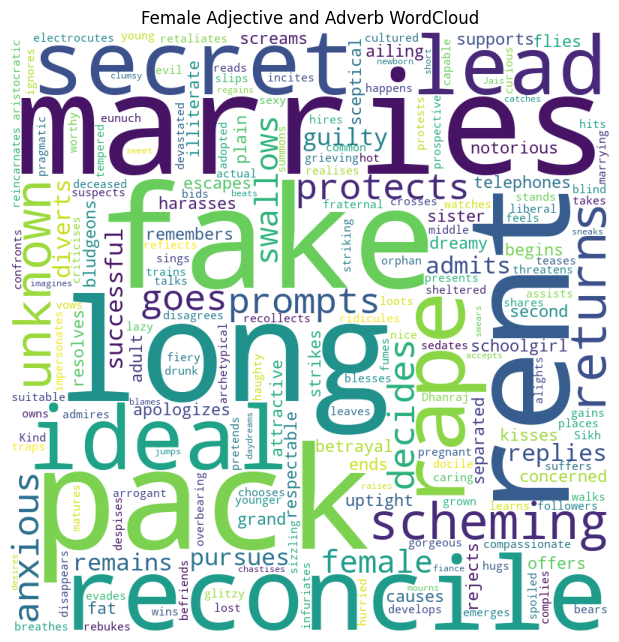

In [186]:
words = ""
from wordcloud import WordCloud, STOPWORDS
with open('wikipedia-data/female_adjverb.csv') as f:
    for line in f.readlines():
        # print("Lines",line)
        idx= line.find(",[")
        idx2 = idx+line[idx+1:].find(",[")
        adjective = line[idx+2:idx2]
        adverb = line[idx2+3:-2]
        # print(adjective,adverb)
        words+=" "+ " ".join(adjective.split(","))
        
        words+=" "+" ".join(adverb.split(","))


# pd.DataFrame({"year":year,"adjectives":adjectives})
words = ' '.join(list(set(words.split())))
# stemmed_roles = [ps.stem(role) for role in words]


# Generate WordCloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(STOPWORDS),
                      min_font_size=10).generate(words)

# Plot the WordCloud image
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Female Adjective and Adverb WordCloud")
plt.show()

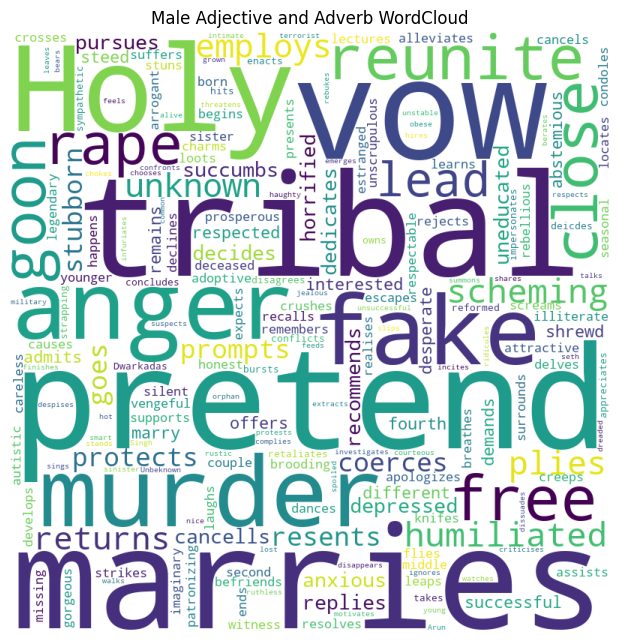

In [185]:
words = ""

with open('wikipedia-data/male_adjverb.csv') as f:
    for line in f.readlines():
        # print("Lines",line)
        idx= line.find(",[")
        idx2 = idx+line[idx+1:].find(",[")
        adjective = line[idx+2:idx2]
        adverb = line[idx2+3:-2]
        # print(adjective,adverb)
        words+=" "+ " ".join(adjective.split(","))
        
        words+=" "+" ".join(adverb.split(","))

words = ' '.join(list(set(words.split())))
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(STOPWORDS),
                      min_font_size=10).generate(words)

# Plot the WordCloud image
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Male Adjective and Adverb WordCloud")
plt.show()

## centrality

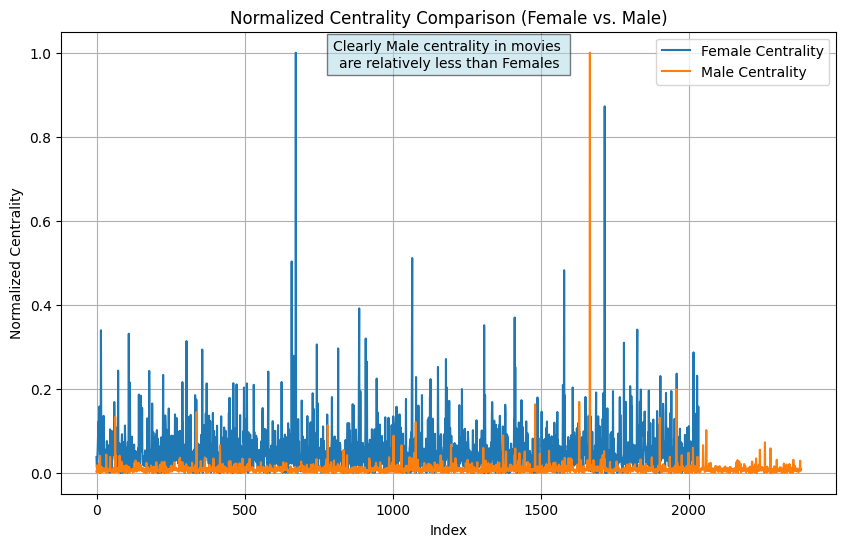

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
female_centrality = pd.read_csv("wikipedia-data/female_centrality.csv").drop(columns=[' Cast Name']).groupby(['Movie Name']).mean().reset_index()
male_centrality = pd.read_csv("wikipedia-data/male_centrality.csv").drop(columns=[' Cast Name']).groupby(['Movie Name']).mean().reset_index()

# Normalize the values
female_centrality['Normalized Centrality'] = (female_centrality[' Average Centrality'] - female_centrality[' Average Centrality'].min()) / (female_centrality[' Average Centrality'].max() - female_centrality[' Average Centrality'].min())
male_centrality['Normalized Centrality'] = (male_centrality[' Average Centrality'] - male_centrality[' Average Centrality'].min()) / (male_centrality[' Average Centrality'].max() - male_centrality[' Average Centrality'].min())

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=female_centrality, x=female_centrality.index, y='Normalized Centrality', label='Female Centrality')
sns.lineplot(data=male_centrality, x=male_centrality.index, y='Normalized Centrality', label='Male Centrality')
plt.xlabel('Index')
plt.ylabel('Normalized Centrality')
plt.grid(True)
plt.title('Normalized Centrality Comparison (Female vs. Male)')
plt.legend()
# Adding description
plt.text(0.5, 0.95, 'Clearly Male centrality in movies \nare relatively less than Females',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes,
         bbox=dict(facecolor='lightblue', alpha=0.5))
plt.show()


## Popular_Words

In [48]:
import pandas as pd
import re
def extract_character_names(nlp_text):
    # Use regex to find words with capital letters (assumed to be character names)
    character_names = ""
    try:
        character_names = re.findall(r'\b[A-Z][a-z]*\b', nlp_text)
    except Exception as e:
        print(e)
    return character_names
df = pd.read_csv("wikipedia-data/image_and_plot_mentions_fequency.csv",sep=";",names=['movie__name','f1','f2','f3','text1','text2','text3','f4','f5'])
df['text1']=df['text1'].apply(lambda x: extract_character_names(x))
df['text2']=df['text2'].apply(lambda x: extract_character_names(x))
df['text3']=df['text3'].apply(lambda x: extract_character_names(x))
df['merged'] = df['text1'] + df['text2'] + df['text3']
df.drop(columns=['f1', 'f2', 'f3', 'f4', 'f5', 'text1', 'text2', 'text3'], inplace=True)
df['merged']=df['merged'].apply(lambda x:list(set(x)))
df.head(3)

expected string or bytes-like object, got 'float'
expected string or bytes-like object, got 'float'
expected string or bytes-like object, got 'float'
expected string or bytes-like object, got 'float'
expected string or bytes-like object, got 'float'
expected string or bytes-like object, got 'float'


,movie__name,merged
0,Aag Aur Daag,[]
1,Aan Milo Sajna,"[Deepali, Diwan, Savitri, Anil]"
2,Aansoo Aur Muskan,[]


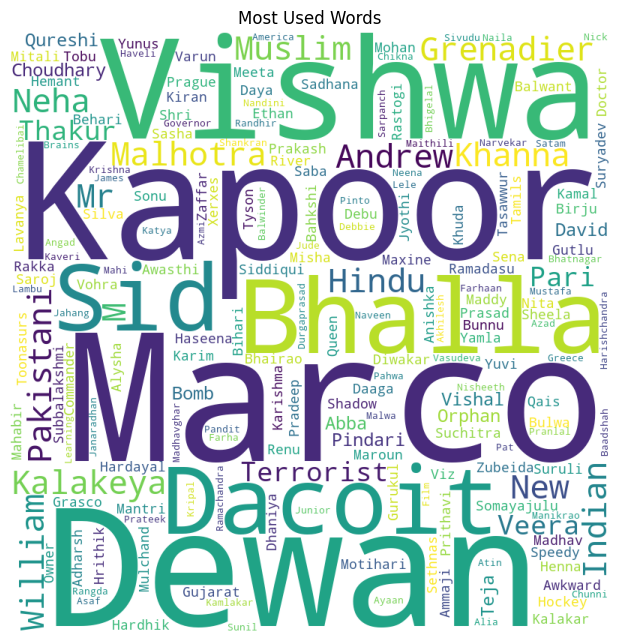

In [59]:
from wordcloud import WordCloud, STOPWORDS
names = []
for lst in df['merged']:
    names+=lst
names = ' '.join(list(set(names)))
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(STOPWORDS),
                      min_font_size=10).generate(names)

# Plot the WordCloud image
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most Used Words")
plt.show()

In [184]:
pd.read_csv('wikipedia-data/songsDB.csv')[['gender','song_count']].groupby(['gender']).sum()

,song_count
gender,
FEMALE,8100
MALE,7655
UNKNOWN,3869


## Most Used plot words

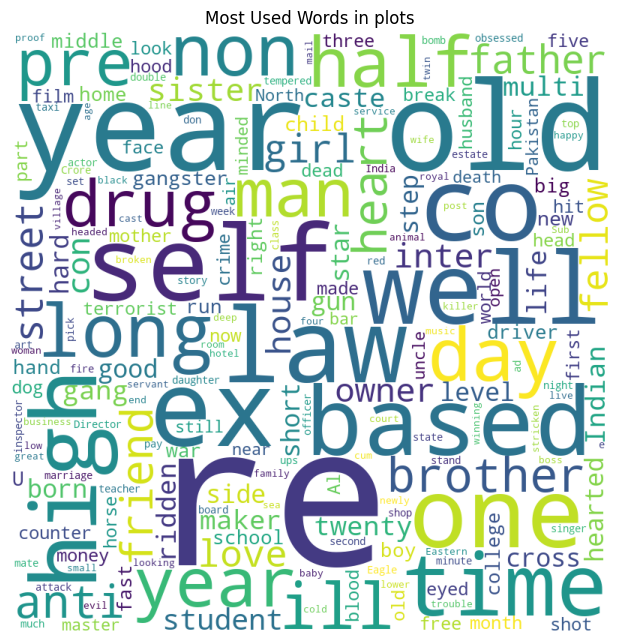

In [68]:
text = ' '.join(pd.read_csv('wikipedia-data/coref_plot.csv',index_col=0)['Coref Plot'])
text = ' '.join(list(set(text.split())))
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=set(STOPWORDS),
                      min_font_size=10).generate(text)

# Plot the WordCloud image
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most Used Words in plots")
plt.show()

## Try with scripts

Pink

In [76]:
# Read the script from a file
with open('scripts-data/Pink_file.txt', 'r', encoding='utf-8') as file:
    script_text = file.read()

# Split the script into scenes (assuming scenes are separated by a line break)
scenes = script_text.split('\n')  # Adjust the delimiter based on your script format

# Store scenes as movie plots
movie_plots = []

for scene in scenes:
    # Additional processing if needed (e.g., removing special characters)
    cleaned_scene = scene.replace('\n', ' ')  # Replace line breaks with spaces
    movie_plots.append(cleaned_scene)

# Print the movie plots



In [78]:
movie_plots

['1 ',
 ' ',
 '     FOR DUBBING  ',
 '  ',
 ' ',
 ' ',
 'PINK  ',
 '              ',
 ' ',
 ' ',
 'Draft 16   ',
 'COMPLETE  ',
 'FWA REG. NO: 275245  ',
 ' ',
 ' ',
 'PRODUCED BY - RISING SUN FILMS  ',
 ' ',
 ' ',
 'DIRECTED BY - ANIRUDDHA ROY CHOWDHURY  ',
 ' ',
 ' ',
 'SCREENPLAY & DIALOGUE - RITESH SHAH  ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' 2 ',
 ' ',
 '     FOR DUBBING  ',
 ' A loud shrill sound of a truck horn.  ',
 ' ',
 'FADE IN:  ',
 '1A. I/E. TAXI SURAJK UND. HIGHWAY. ROAD - NIGHT ',
 '27TH MARCH - DAY 1 - NIGHT - 2AM ',
 ' ',
 'DONE ON ',
 'A taxi swerves out of the path of the blaring truck ',
 'just in time.  ',
 'The truck goes past.  ',
 'The taxi driver rubs his eyes. The guy must have ',
 'gone off to sleep.  ',
 'In the back three girls, MINAL, AN DREA AND FALAK. ',
 'Andrea is sitting in between them and she is ',
 'trembling with fear.  ',
 'DONE ON 28TH MARCH  ',
 'Falak is looking at Minal. Minal is looking at the ',
 'driver and Minal sees that his eyes are shutti